**K Nearest Neighbour Model for User Authentication based on Keystroke Dynamics.**



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

**Load and explore data**

In [23]:
data = pd.read_csv(r"C:\Users\Admin\Desktop\Keystroke_analysis\KeystrokeLoggingApplication\src\Keystrokes_cleaned.csv", on_bad_lines='skip')
data.head()

,User,target,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,...,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l
Adithi,Genuine,0.135,0.370,0.235,0.176,0.317,0.141,0.166,0.950,0.784,...,0.448,0.297,0.156,0.257,0.101,0.180,0.890,0.710,0.190,
Adithi,Genuine,0.170,0.542,0.372,0.146,0.478,0.332,0.222,0.422,0.200,...,0.367,0.192,0.210,0.578,0.368,0.131,0.580,0.449,0.184,NaN
Adithi,Genuine,0.151,0.477,0.326,0.146,0.337,0.191,0.202,0.373,0.171,...,0.352,0.186,0.196,0.201,0.005,0.201,0.272,0.071,0.161,NaN
Adithi,Genuine,0.125,0.377,0.252,0.131,0.231,0.100,0.171,0.323,0.152,...,0.268,0.106,0.221,0.296,0.075,0.191,0.347,0.156,0.151,NaN
Adithi,Genuine,0.140,0.336,0.196,0.150,0.205,0.055,0.136,0.307,0.171,...,0.271,0.160,0.152,0.171,0.019,0.125,0.237,0.112,0.135,NaN


In [8]:
data.columns

Index(['User', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i',
       'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five',
       'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r',
       'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a',
       'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return',
       'UD.l.Return', 'H.Return', 'target'],
      dtype='object')


**Data Visualization**

In [24]:
print(data.columns.tolist())

['User', 'target', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l']


In [16]:
data.columns = data.columns.str.strip()
print(data.columns.tolist())  # Check again after stripping

['User', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return', 'target']


ValueError: cannot reindex on an axis with duplicate labels

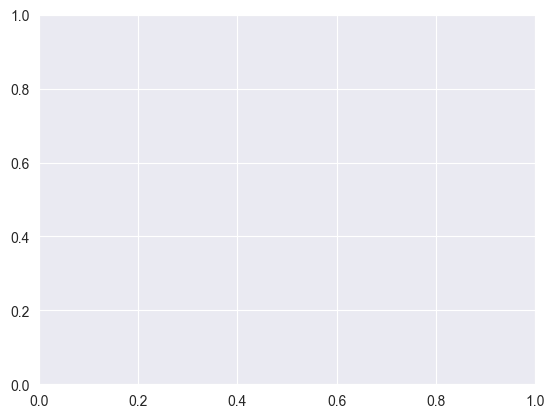

In [25]:
sns.set_style('darkgrid')
sns.countplot(x='target',data=data)

**matching the count of genuine and imposter**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Keystrokes_cleaned.csv')

# Check the unique values in the target column
print(df['target'].value_counts())

# Plot the distribution of genuine and imposter
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='target', palette='Set2')
plt.title('Distribution of Genuine and Imposter')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Keystrokes.csv'

In [ ]:
# Find the minimum class count
min_count = data['Target'].value_counts().min()

# Downsample "Genuine" to match "Imposter"
balanced = data.groupby('Target').sample(n=min_count, random_state=42)

# Check new counts
print(balanced['Target'].value_counts())
balanced.to_csv("balanced_Keystrokes_cleaned.csv", index=False)

KeyError: 'Target'

**load and exploring the balanced  data**

In [ ]:
data = pd.read_csv(r"C:\Users\Admin\Desktop\Keystroke_analysis\KeystrokeLoggingApplication\src\Keystrokes_cleaned.csv", on_bad_lines='skip')
data.head()

NameError: name 'pd' is not defined

In [34]:
data.columns

Index(['User', 'Target', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t',
       'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.five',
       'UD.e.five', 'H.five', 'DD.five.Shift.r', 'UD.five.Shift.r',
       'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o', 'DD.o.a', 'UD.o.a',
       'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l',
       'DD.l.Return', 'UD.l.Return', 'H.Return'],
      dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_15316\1816638351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=data, palette={'Genuine': 'royalblue', 'Imposter': 'orange'})


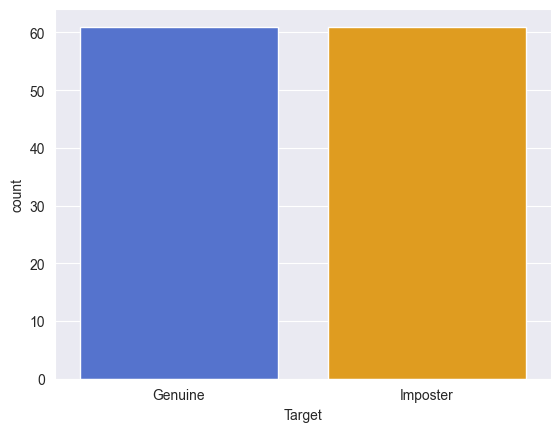

In [39]:
sns.set_style('darkgrid')
sns.countplot(x='Target', data=data, palette={'Genuine': 'royalblue', 'Imposter': 'orange'})
plt.show()

**Split data into train and test data**

In [44]:
train, test = train_test_split(data, test_size = 0.2)
features = list(data.columns[2:])  # Skip 'User' and 'Target'
X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']

**Train model with training data.**

In [45]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [48]:
y_test.count()

np.int64(25)

**Predict Results**

[[10  2]
 [ 4  9]]


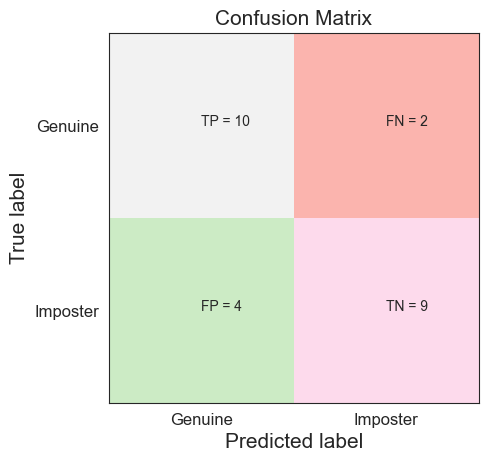

In [49]:
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=12)
plt.yticks(tick_marks, classNames,fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [50]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Genuine       0.71      0.83      0.77        12
    Imposter       0.82      0.69      0.75        13

    accuracy                           0.76        25
   macro avg       0.77      0.76      0.76        25
weighted avg       0.77      0.76      0.76        25



In [51]:
model_accuracy = metrics.accuracy_score(y_test, pred)
print('Accuracy of Model is : ',model_accuracy)

Accuracy of Model is :  0.76


In [52]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

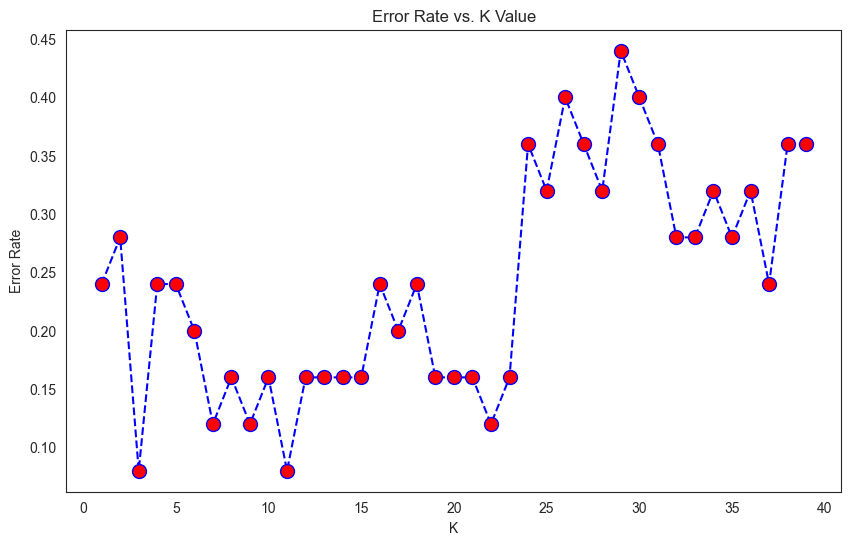

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [55]:
error_rate = []

# Will take some time
for i in range(1,70):
    train, test = train_test_split(data, test_size = 0.2, random_state=i)
    features = list(data.columns[2:])
    X = data[features]
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.05, '0.05'),
  Text(0, 0.1, '0.10'),
  Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40'),
  Text(0, 0.45, '0.45'),
  Text(0, 0.5, '0.50')])

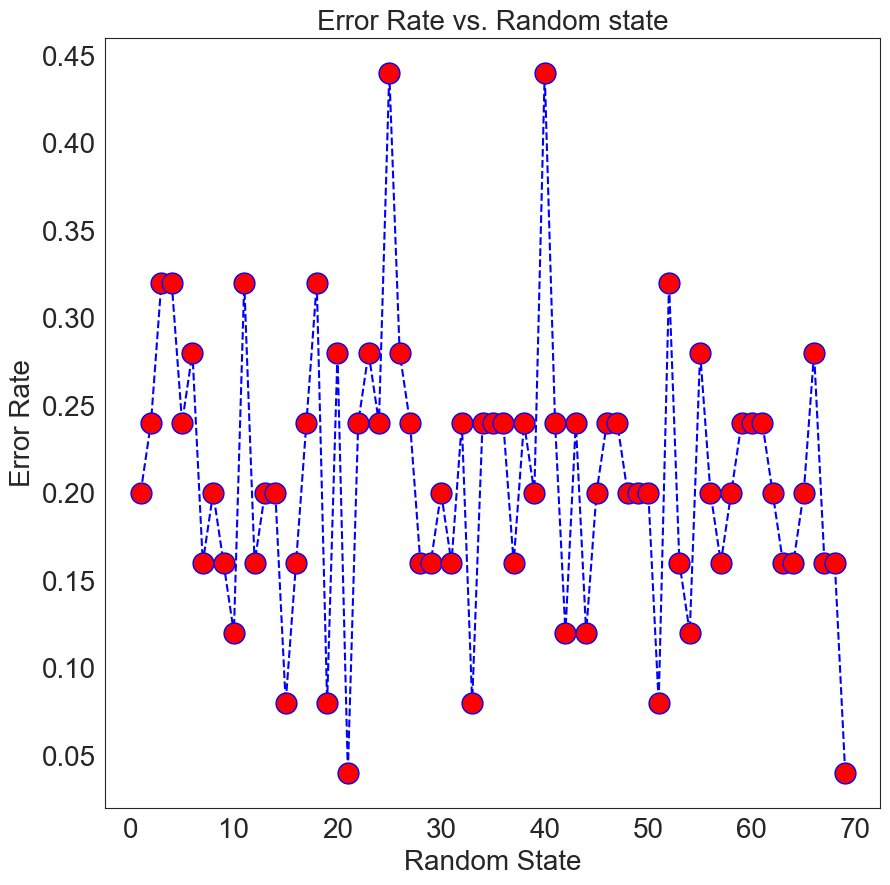

In [56]:
ax =plt.figure(figsize=(10,10))
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=15,)
plt.title('Error Rate vs. Random state',fontsize=20)
plt.xlabel('Random State',fontsize=20)
plt.ylabel('Error Rate',fontsize=20)
# plt.axis([1,70,0.1,])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


In [58]:
C_prange = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracy = []

for i in C_prange:
      
    train, test = train_test_split(data, test_size = i,random_state = 33)
    features = list(data.columns[2:])
    X = data[features]
    y =data['Target']
    X_train = train[features]
    y_train = train['Target']
    X_test = test[features]
    y_test = test['Target']
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    model_accuracy = metrics.accuracy_score(y_test,pred)
    accuracy.append(model_accuracy)

Text(0, 0.5, 'Accuracy')

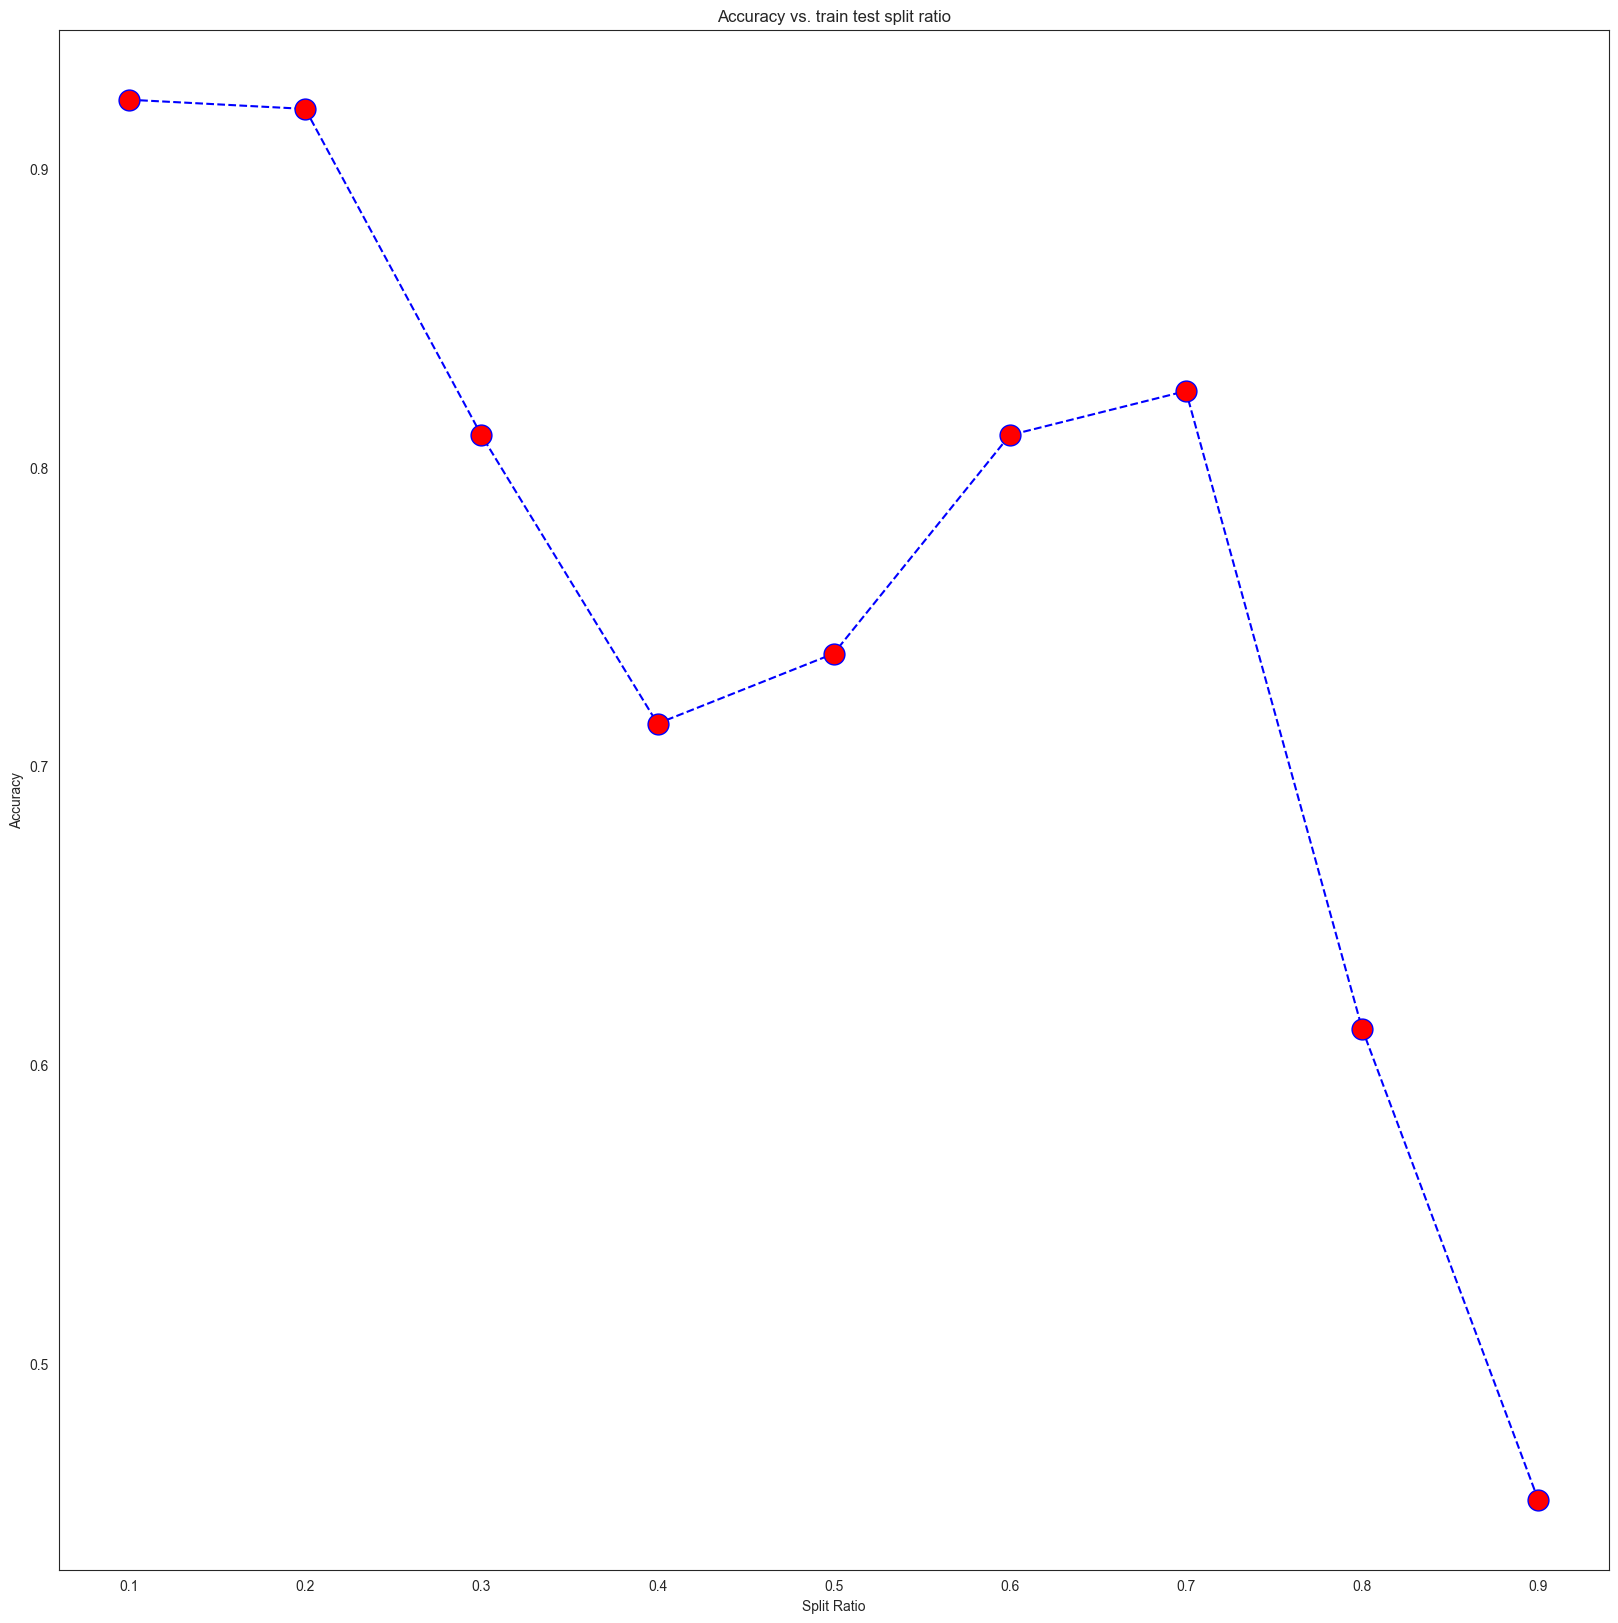

In [59]:
ax =plt.figure(figsize=(20,20))
plt.plot(C_prange,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=15)
plt.title('Accuracy vs. train test split ratio')
plt.xlabel('Split Ratio')
plt.ylabel('Accuracy')

In [ ]:
data = pd.read_csv(r"C:\Users\Admin\Desktop\Keystroke_analysis\KeystrokeLoggingApplication\src\balanced_Keystrokes_cleaned.csv", on_bad_lines='skip')
train, test = train_test_split(data, test_size = 0.2, random_state=35)
features = list(data.columns[2:])


X_train = train[features]
y_train = train['Target']
X_test = test[features]
y_test = test['Target']
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)



,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


[[ 8  5]
 [ 1 11]]


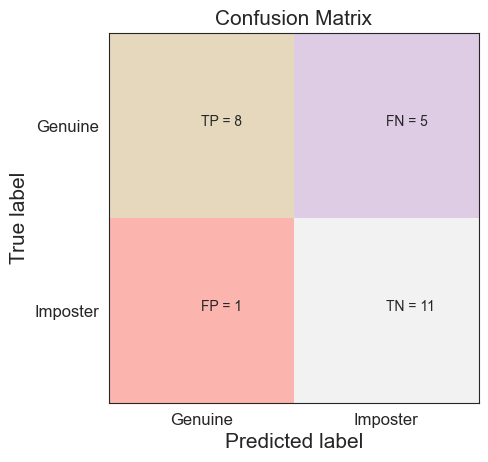

In [66]:
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(confusion_matrix(y_test,pred))
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=12)
plt.yticks(tick_marks, classNames,fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [67]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Genuine       0.89      0.62      0.73        13
    Imposter       0.69      0.92      0.79        12

    accuracy                           0.76        25
   macro avg       0.79      0.77      0.76        25
weighted avg       0.79      0.76      0.76        25



In [68]:
model_accuracy = metrics.accuracy_score(y_test, pred)
print('Accuracy of Model is : ',model_accuracy)

Accuracy of Model is :  0.76
